## Homework Lab3

### Use the UN General Debates dataset

In [1]:
import pandas as pd
import nltk 
import regex as re #regular expression
from collections import Counter #counter
from wordcloud import WordCloud # wordcloud
import matplotlib.pyplot as plt # visualization

In [3]:
df = pd.read_csv("D:/Pum_Program/HDS_WORK/Year 3/Semester 1/Text analytics/Lecture1_Lab2/un-general-debates-blueprint.csv.gz")

## Explore the pattern

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


In [5]:
textraw = [ w.lower() for w in df["text"] ] ### get lower str of raw text 

In [6]:
tokens = []
for word in textraw:
    tokens.extend( nltk.word_tokenize(word) ) #row 7500 ++

In [7]:
len(tokens)

23478719

## Remove stopwords

In [8]:
stopwords = set(nltk.corpus.stopwords.words("english"))

In [9]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [10]:
tokens_rm_stpword = remove_stop(tokens)

In [11]:
len(tokens_rm_stpword)

13260195

### -ed/-ing suffix

In [12]:
suffix_ed_ing_pattern = [w for w in tokens_rm_stpword if re.search("(ed|ing)$",w)] # -ed/-ing suffix

In [18]:
suffix_ed_ing_pattern = set(suffix_ed_ing_pattern)
suffix_ed_ing_pattern = list(suffix_ed_ing_pattern)

In [20]:
len(suffix_ed_ing_pattern)

11830

In [19]:
suffix_ed_ing_pattern[0:10] #sample

["'regarding",
 'self-confessed',
 'shuddered',
 'all-absorbing',
 'victim—ceasing',
 'engendering',
 'approving',
 'fetching',
 'grappling',
 'desalinized']

### year or serial-number pattern

In [14]:
year_serialno_pattern = [w for w in tokens_rm_stpword if re.search("^[0-9]{4}$", w)] # Year or serial-number  pattern

In [21]:
year_serialno_pattern = set(year_serialno_pattern)
year_serialno_pattern = list(year_serialno_pattern)

In [24]:
len(year_serialno_pattern)

731

In [22]:
year_serialno_pattern[0:10] #sample

['1831',
 '1936',
 '1747',
 '1865',
 '2229',
 '1879',
 '1427',
 '2048',
 '1533',
 '1063']

### Identify the cleaning points

In [23]:
identify_cleaning = [w for w in tokens_rm_stpword if re.search(r'[,\.\?\!\:\;"]\s*', w)]

In [25]:
identify_cleaning = set(identify_cleaning)
identify_cleaning = list(identify_cleaning)

In [26]:
identify_cleaning[0:10] #sample

['.conference',
 '.particular',
 '0.741',
 '10.5',
 '5.2',
 'a/54/pv.9',
 '1,650',
 '19,190',
 'states.',
 '279.']

#### found  [  ,  ]  [  .  ]  [  ?  ]  [  :  ] [  ;  ]  [running number of speech ex: 34.] 

### Conduct text cleaning

In [27]:
cleaned_tokens = []
for w in tokens_rm_stpword:
    cleaned_tokens.extend( nltk.regexp_tokenize(w,r'[,\.\?\!\:\;"]\s*',gaps=True) )

#### Stemming

In [28]:
porter = nltk.PorterStemmer()
tokens = [porter.stem(t) for t in cleaned_tokens]

In [29]:
tokens[0:10] #sample

['33',
 'may',
 'first',
 'convey',
 'presid',
 'congratul',
 'albanian',
 'deleg',
 'elect',
 'presid']

### Explore the word and character distribution

#### stemming words counting

In [30]:
counting_words = Counter(tokens)

In [31]:
counting_words.most_common(10)

[('nation', 155664),
 ('countri', 126359),
 ('intern', 124252),
 ('unit', 122289),
 ('develop', 108917),
 ('world', 89390),
 ('peac', 88490),
 ('state', 84739),
 ('peopl', 84342),
 ('secur', 62695)]

In [32]:
wc = WordCloud(width = 800, height =400,
              background_color = "black", colormap="Paired",
              max_font_size = 150, max_words = 200)

(-0.5, 799.5, 399.5, -0.5)

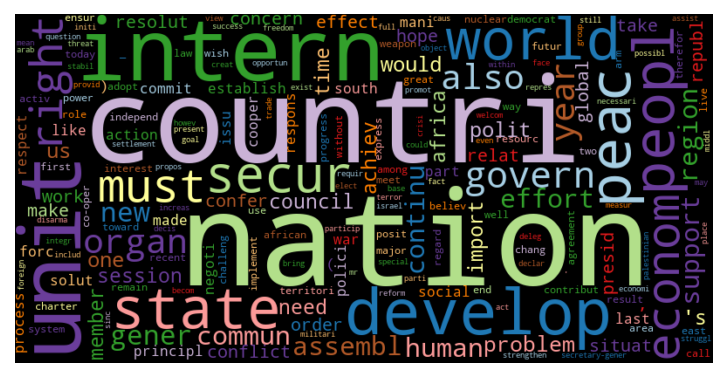

In [33]:
wc.generate_from_frequencies(counting_words)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Error Stemming words 
#### Countries --> countri
#### people --> peopl
#### peace,peaceful --> peac
#### resolution --> resolut
#### and more 